In [1]:
import pandas as pd

df1=pd.read_excel(r"C:\Users\Harish\Downloads\forcast and observed data.xlsx", sheet_name='observed')
df2=pd.read_excel(r"C:\Users\Harish\Downloads\forcast and observed data.xlsx", sheet_name='forecast')

In [2]:
df1.columns

Index(['Unnamed: 0', 'RF', 'tmax', 'tmin', 'rh1', 'rh2', 'ws', 'wd'], dtype='object')

In [3]:
from forecast_verification import Medium_Range_Forecast_Verification as mrfv

verif=mrfv(observed=df1, forecast=df2, 
           start_date='11-07-2022', end_date='02-01-2023', 
           climatology=df2, dv_col='RF', dv_threshold=2.5, 
           usability_analysis={'TMAX':[1,2],'TMIN':[1,2],'WS':[3,6],'WD':[45,60],'RH1':[3,5],'RH2':[3,5]})

# df1 and df2 as pandas dataframe
# start date and end date as string
# climatology can be a dataframe or dictionary / list of climatological values
# dv_col is the column name that has to be verified using dichotomous verification.
# dv_threshold is the threshold value for dichotomous verification

In [4]:
print(verif.usability_analysis())

+--------------+-----------+-----------+------------+---------+
| Parameters   |   Correct |   Useable |   Unusable |   Total |
+==============+===========+===========+============+=========+
| TMAX         |       107 |        47 |         25 |     179 |
+--------------+-----------+-----------+------------+---------+
| TMIN         |       127 |        21 |         27 |     175 |
+--------------+-----------+-----------+------------+---------+
| WS           |        11 |        40 |        124 |     175 |
+--------------+-----------+-----------+------------+---------+
| WD           |       140 |         8 |         26 |     174 |
+--------------+-----------+-----------+------------+---------+
| RH1          |       173 |         0 |          0 |     173 |
+--------------+-----------+-----------+------------+---------+
| RH2          |       170 |         1 |          3 |     174 |
+--------------+-----------+-----------+------------+---------+


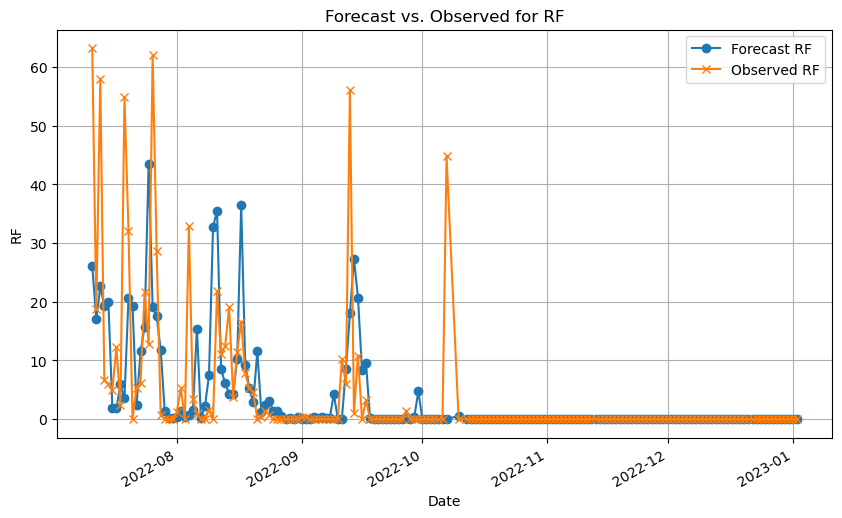

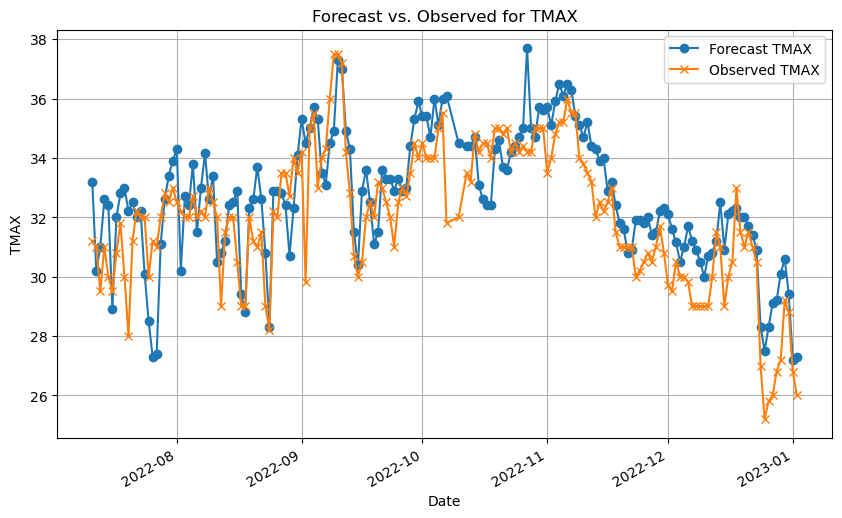

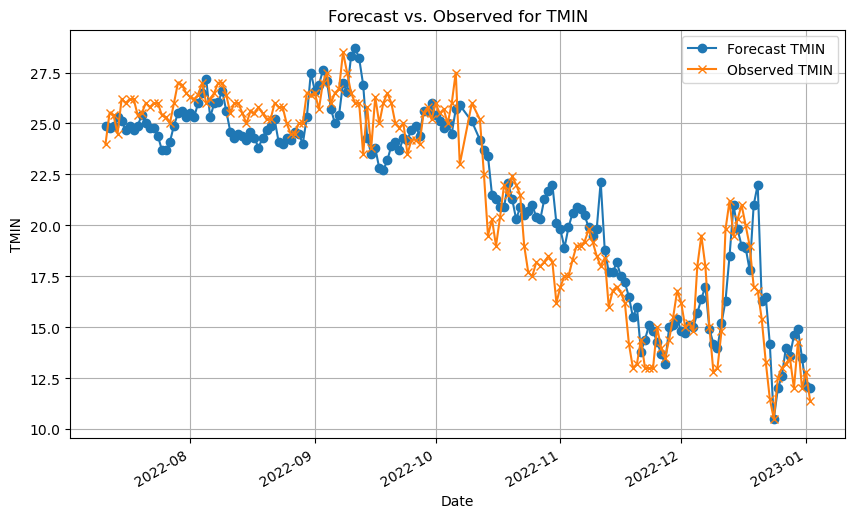

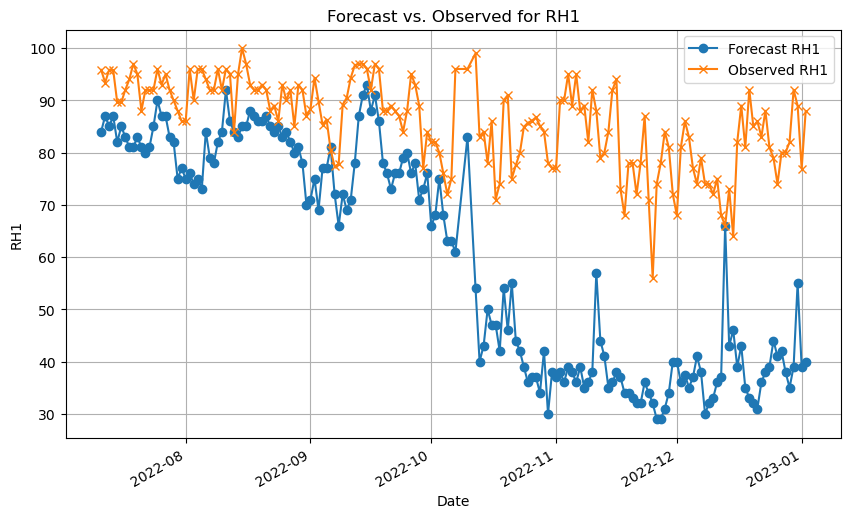

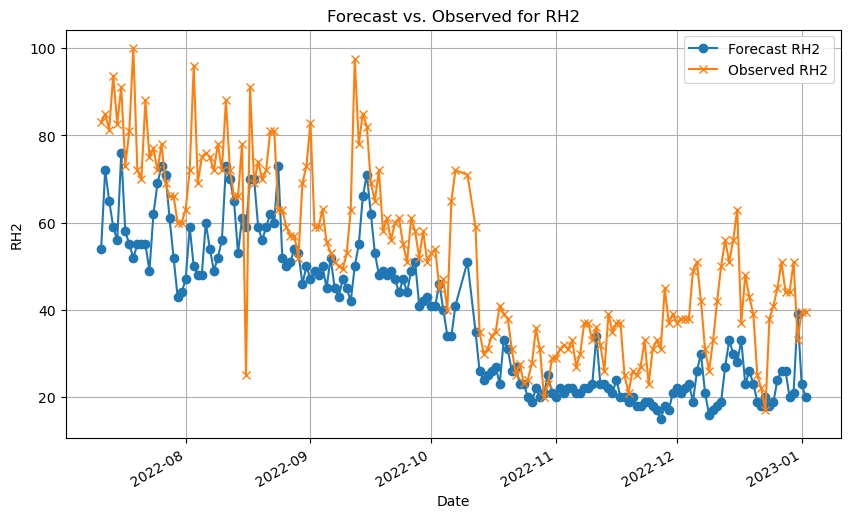

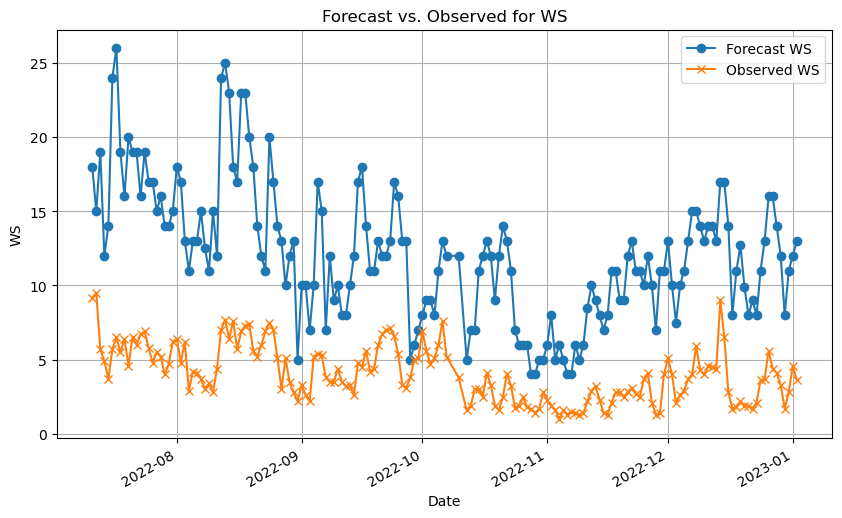

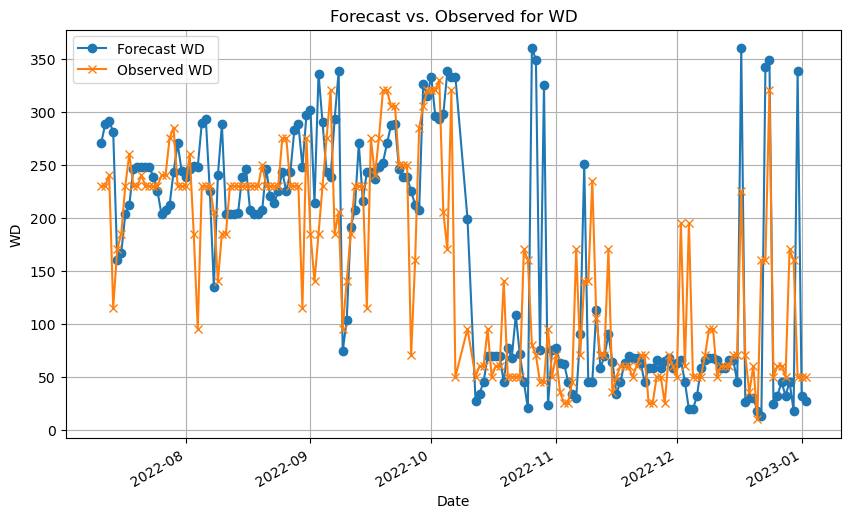

In [5]:
verif.eyeball_verification()

In [6]:
print(verif.scores())

+-------------------------+-----------+----------+-----------+------------+------------+----------+------------+
| errors or coefficient   |        RF |     TMAX |      TMIN |        RH1 |        RH2 |       WS |         WD |
+=========================+===========+==========+===========+============+============+==========+============+
| Mean Error              | -0.578324 | 0.696532 | 0.0962428 | -25.8319   | -13.7319   |  8.07091 |   10.104   |
+-------------------------+-----------+----------+-----------+------------+------------+----------+------------+
| MSE                     | 99.5179   | 2.28968  | 2.78571   | 978.776    | 297.474    | 77.0556  | 6120.79    |
+-------------------------+-----------+----------+-----------+------------+------------+----------+------------+
| RMSE                    |  9.97586  | 1.51317  | 1.66904   |  31.2854   |  17.2474   |  8.77813 |   78.2355  |
+-------------------------+-----------+----------+-----------+------------+------------+--------

In [7]:
verif.all_scores()


                                                  Errors and Correlation:

+-------------------------+-----------+----------+-----------+------------+------------+----------+------------+
| errors or coefficient   |        RF |     TMAX |      TMIN |        RH1 |        RH2 |       WS |         WD |
+=========================+===========+==========+===========+============+============+==========+============+
| Mean Error              | -0.578324 | 0.696532 | 0.0962428 | -25.8319   | -13.7319   |  8.07091 |   10.104   |
+-------------------------+-----------+----------+-----------+------------+------------+----------+------------+
| MSE                     | 99.5179   | 2.28968  | 2.78571   | 978.776    | 297.474    | 77.0556  | 6120.79    |
+-------------------------+-----------+----------+-----------+------------+------------+----------+------------+
| RMSE                    |  9.97586  | 1.51317  | 1.66904   |  31.2854   |  17.2474   |  8.77813 |   78.2355  |
+-------------------

In [18]:
print(verif.contingency_tables)


Contingency Table for RF: 
              Forecast Yes  Forecast No  Total
Observed Yes            27            8     35
Observed No             12          126    138
Total                   39          134    173

